In [1]:
# first line and already a bad practice, don't do this kids
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from _scripts.filter_progressives import filter_progressives
from _scripts.calculate_features import calculate_features
from _scripts.cluster import cluster
from _scripts.plot_clusters import plot_clusters
from _scripts.plt_utils import add_ax_title, add_title, add_subtitle
from _scripts.metadata import *

home_team = 'PSG'
away_team = 'Man City'

layout = [
    [(home_team, team_key), (away_team, team_key)],
    [(away_team, opp_key), (home_team, opp_key)]
]

In [2]:
df = pd.read_csv('passes.csv')
prog_df = filter_progressives(df)

prog_df.head()

All Passes: 27882
Progressive Passes: 2014 (7.22%)


,team_name,opposition_name,start_x,end_x,start_y,end_y
9,Man City,Arsenal,5.355,50.190,37.128,10.132
12,Man City,Arsenal,81.900,86.205,6.256,19.584
37,Man City,Arsenal,72.450,83.580,59.024,55.964
59,Arsenal,Man City,9.765,40.215,46.920,34.884
87,Man City,Arsenal,67.935,83.370,34.612,18.360


In [3]:
prog_df = calculate_features(prog_df)
prog_df.head()

,team_name,opposition_name,start_x,end_x,start_y,end_y,angle
9,Man City,Arsenal,5.355,50.190,37.128,10.132,31.052940
12,Man City,Arsenal,81.900,86.205,6.256,19.584,-72.099325
37,Man City,Arsenal,72.450,83.580,59.024,55.964,15.372662
59,Arsenal,Man City,9.765,40.215,46.920,34.884,21.567447
87,Man City,Arsenal,67.935,83.370,34.612,18.360,46.476955


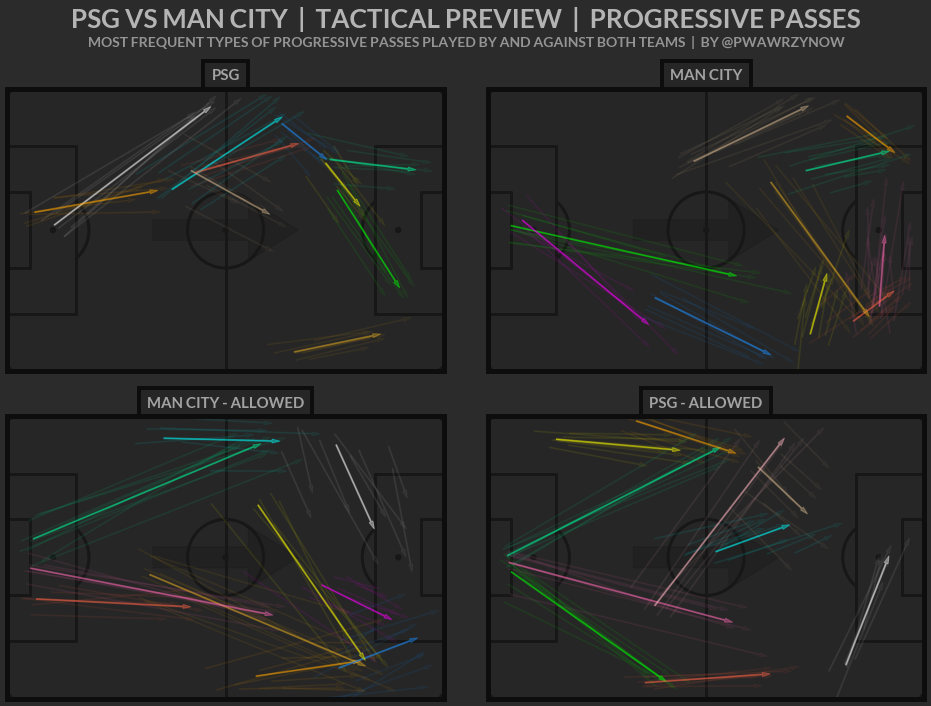

In [4]:
import matplotlib.pyplot as plt
import matplotlib.style as style

style.use("seaborn-dark")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Lato']
plt.rcParams['figure.facecolor'] = '#2b2b2b'
plt.rcParams['savefig.facecolor'] = '#2b2b2b'

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for n_row in range(2):
    for n_col in range(2):
        team = layout[n_row][n_col][0]
        column = layout[n_row][n_col][1]
        ax = axes[n_row][n_col]
        
        passes = prog_df[prog_df[column] == team]
        passes = cluster(passes)
        plot_clusters(ax, passes)
        add_ax_title(ax, team, column)

add_title(fig, f'{home_team} vs {away_team}  |  Tactical Preview  |  Progressive Passes')
add_subtitle(fig, 'Most Frequent types of progressive passes played by and against both teams  |  by @pwawrzynow')
plt.subplots_adjust(left=0.045, right=0.955, bottom=0.03, top=0.88, wspace=0.1, hspace=0.15)
fig.savefig('result.png', dpi=300)